To demonstrate the ``CPPPlot().heatmap()`` method, we first load the example ``DOM_GSEC`` dataset and its respective features (see [Breimann25a]_):


In [1]:
import matplotlib.pyplot as plt
import aaanalysis as aa
aa.options["verbose"] = False

df_seq = aa.load_dataset(name="DOM_GSEC")
df_feat = aa.load_features(name="DOM_GSEC")
df_feat = df_feat.sort_values(by="feat_importance", ascending=False).reset_index(drop=True)
aa.display_df(df_feat, show_shape=True, n_rows=7)

DataFrame shape: (150, 15)


,feature,category,subcategory,scale_name,scale_description,abs_auc,abs_mean_dif,mean_dif,std_test,std_ref,p_val_mann_whitney,p_val_fdr_bh,positions,feat_importance,feat_importance_std
1,"TMD_C_JMD_C-Seg...,11)-LIFS790102",Conformation,β-strand,β-strand,"Conformational ...n-Sander, 1979)",0.189000,0.125674,0.125674,0.183876,0.218813,0.000001,0.000039,"28,29",4.729200,4.776785
2,"TMD_C_JMD_C-Seg...2,3)-CHOP780212",Conformation,β-sheet (C-term),β-turn (1st residue),"Frequency of th...-Fasman, 1978b)",0.199000,0.065983,-0.065983,0.087814,0.105835,0.000000,0.000016,"27,28,29,30,31,32,33",4.106000,5.236574
3,"TMD_C_JMD_C-Seg...3,4)-HUTJ700102",Energy,Entropy,Entropy,"Absolute entrop...Hutchens, 1970)",0.229000,0.098224,0.098224,0.106865,0.124608,0.000000,0.000001,"31,32,33,34,35",3.111200,3.109955
4,"TMD_C_JMD_C-Seg...2,3)-AURR980110",Conformation,α-helix,α-helix (middle),"Normalized posi...ora-Rose, 1998)",0.211000,0.077355,0.077355,0.102965,0.107453,0.000000,0.000005,"27,28,29,30,31,32,33",3.048800,3.623912
5,"TMD_C_JMD_C-Pat...4,8)-JANJ790102",Energy,Free energy (unfolding),Transfer free e...(TFE) to inside,"Transfer free e...y (Janin, 1979)",0.187000,0.144354,-0.144354,0.181777,0.233103,0.000001,0.000049,"33,37",2.833600,3.640617
6,"TMD_C_JMD_C-Pat...4,8)-KANM800103",Conformation,α-helix,α-helix,"Average relativ...sa-Tsong, 1980)",0.176000,0.087846,0.087846,0.140464,0.157561,0.000004,0.000113,"24,28",2.704000,4.076269
7,"TMD_C_JMD_C-Pat...,10)-LEVM760105",Shape,Side chain length,Side chain length,"Radius of gyrat... (Levitt, 1976)",0.149000,0.073526,0.073526,0.133612,0.157088,0.000090,0.000714,"31,34,38",2.050800,2.338278


**CPP Analysis (group-level)**

The group-level feature value difference per scale subcategory (y-axis) and residue position (x-axis) can be visualized by providing the ``df_feat`` DataFrame:

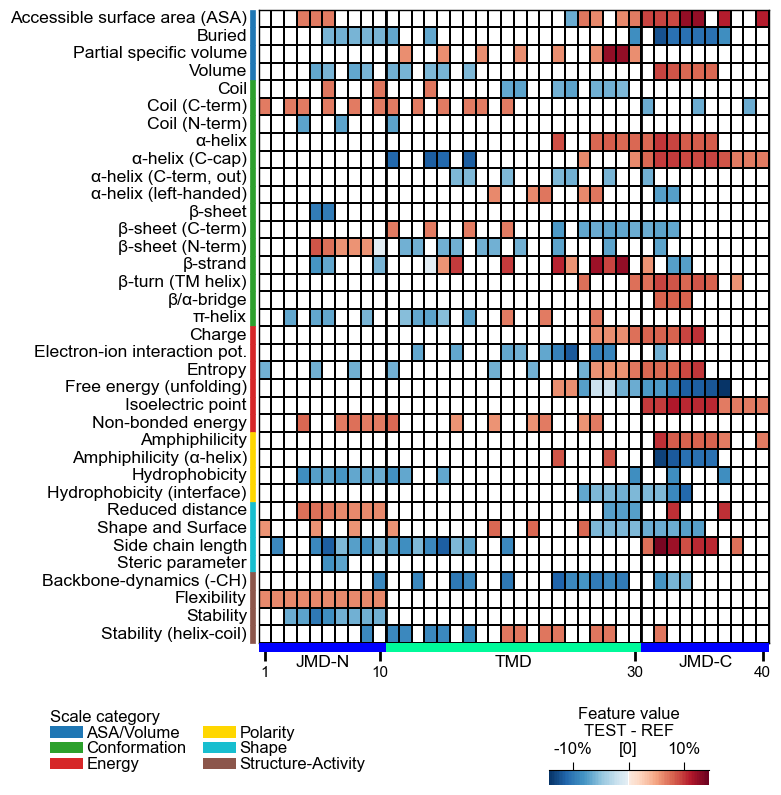

In [2]:
# Plot CPP heatmap at group-level
cpp_plot = aa.CPPPlot()
aa.plot_settings(font_scale=0.7, weight_bold=False)
cpp_plot.heatmap(df_feat=df_feat)
plt.show()

You can select a subset of features by filtering ``df_feat``: 

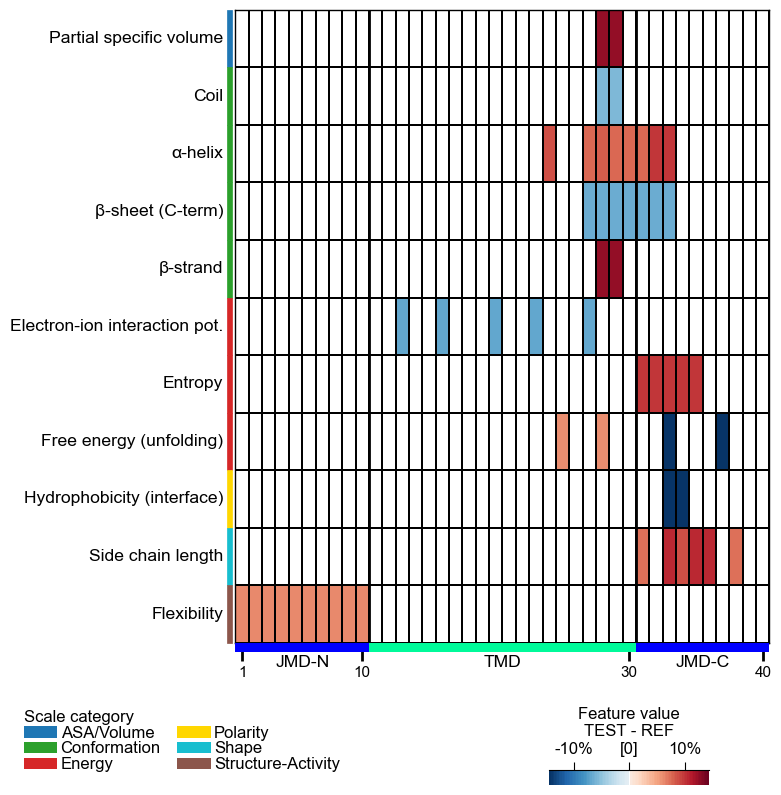

In [3]:
# Plot top 15 features
df_top15 = df_feat.head(15)
cpp_plot.heatmap(df_feat=df_top15)
plt.show()

Adjust the scale classification level (y-axis) using the ``col_cat`` parameter. Choose from the 'category', 'subcategory' (default), and 'scale_name' columns from the ``df_feat``:

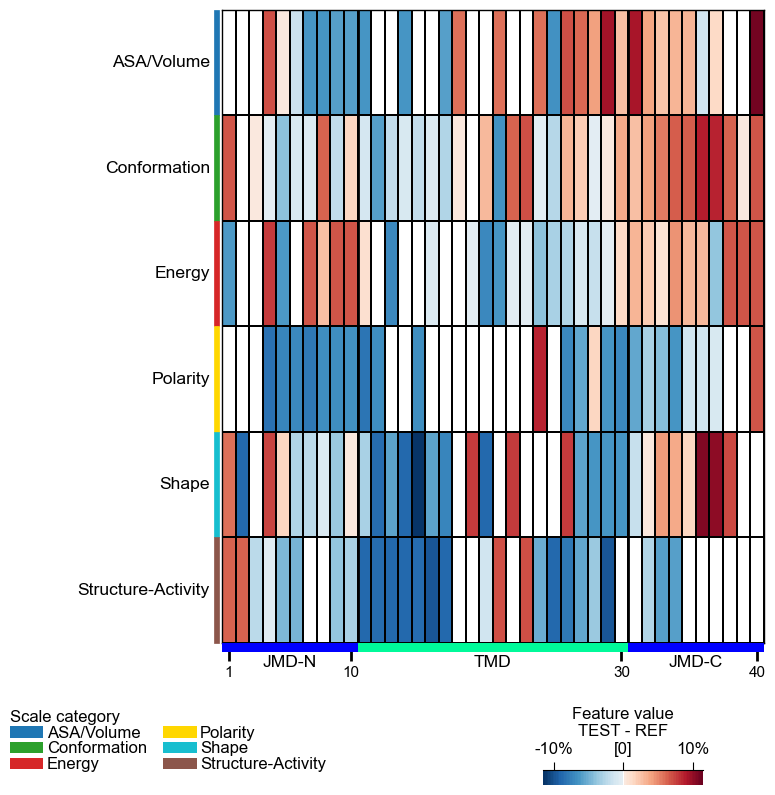

In [4]:
# Show heatmap with scales classified by categories
cpp_plot.heatmap(df_feat=df_feat, col_cat="category")
plt.show()

The numerical value shown in the heatmap can be adjusted by the ``col_val`` parameter, which specifies one of the following ``df_feat`` columns: 'mean_dif' (default), 'abs_mean_dif', 'abs_auc', or 'feat_importance':  

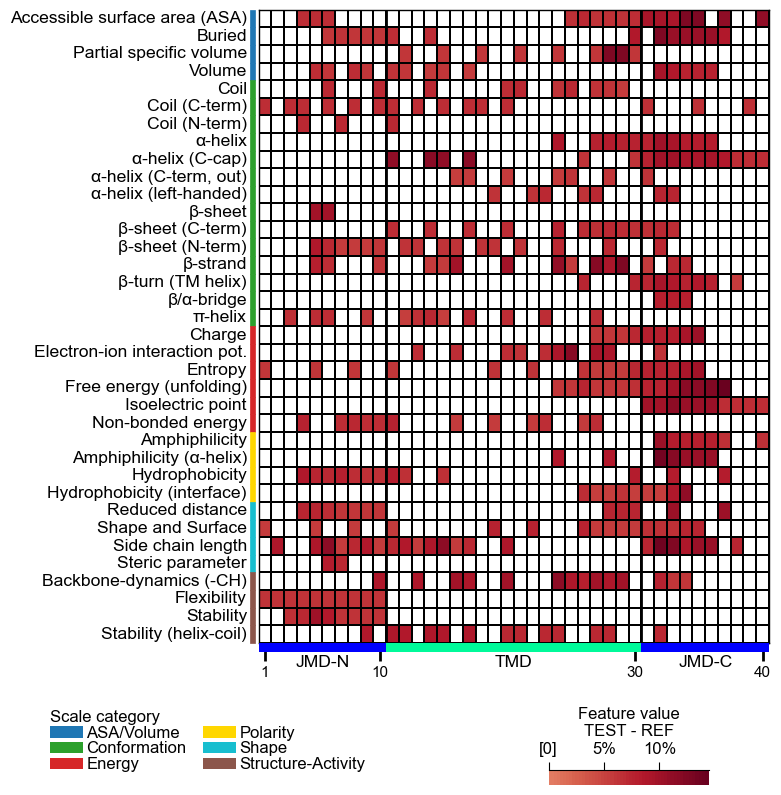

In [5]:
# Show heatmap with absolute feature value difference
cpp_plot.heatmap(df_feat=df_feat, col_val="abs_mean_dif")
plt.show()

Adjust the names of the test and reference datasets using the ``name_test`` (default='TEST') and ``name_ref`` (default='REF') parameters:

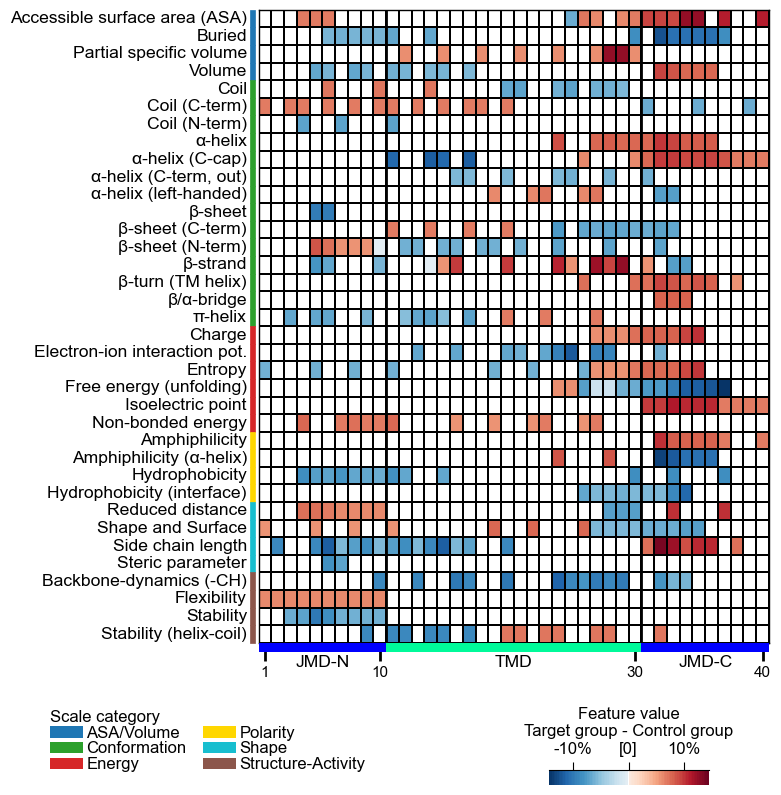

In [6]:
# Adjust dataset names shown in colorbar 
cpp_plot.heatmap(df_feat=df_feat, name_test="Target group", name_ref="Control group")
plt.show()

You can adjust the ``figsize`` (default=(8, 8)), useful if only a subset of features is shown:

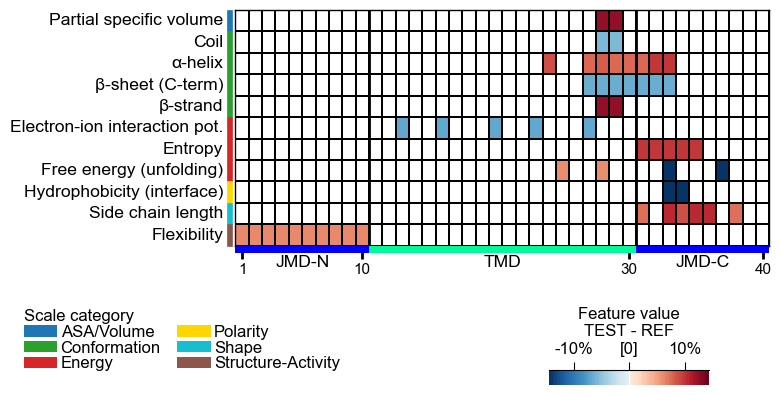

In [7]:
# Show only top 15 features
df_top15 = df_feat.head(15)
cpp_plot.heatmap(df_feat=df_top15, figsize=(8, 4))
plt.show()

You can adjust the ``start`` position and the ``tmd_len`` (default=20) by providing them as parameters. Change the length of the ``jmd_n`` and ``jmd_c`` using the ``CPPPlot`` object.

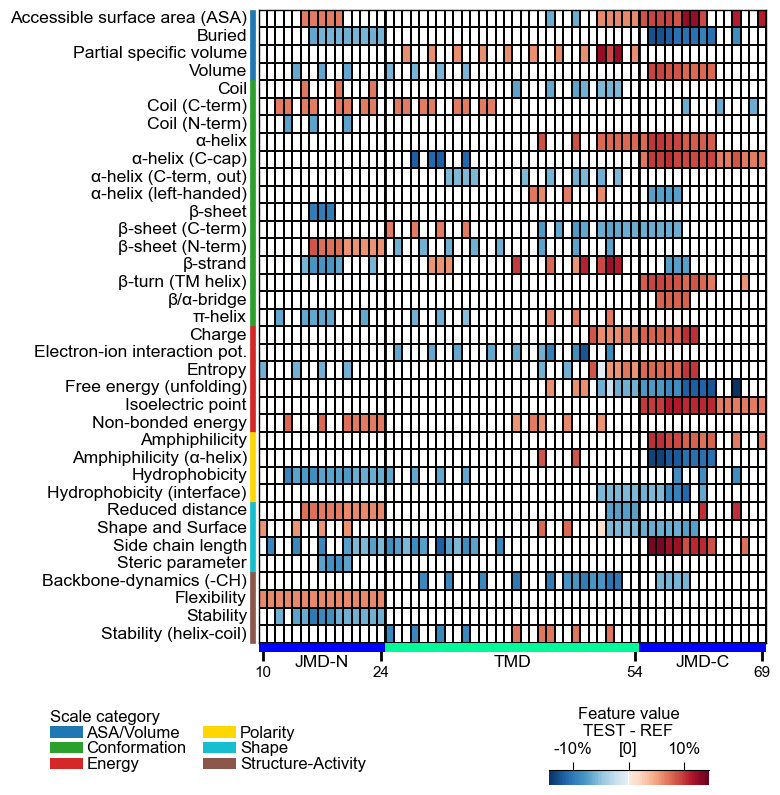

In [8]:
# Start at residue position 10 and adjust the length each part
cpp_plot = aa.CPPPlot(jmd_n_len=15, jmd_c_len=15)
cpp_plot.heatmap(df_feat=df_feat, start=10, tmd_len=30)
plt.show()

**CPP Analysis (sample-level)**

You can visualize how the general feature value difference is translated onto the sequence of a specific sample. To this end, you need to provide the corresponding sequence parameters: ``jmd_n_seq``, ``tmd_seq``, and ``jmd_c_seq``:

Sequence parts of first sample
FAEDVGSNKG AIIGLMVGGVVIATVIVITLVML KKKQYTSIHH


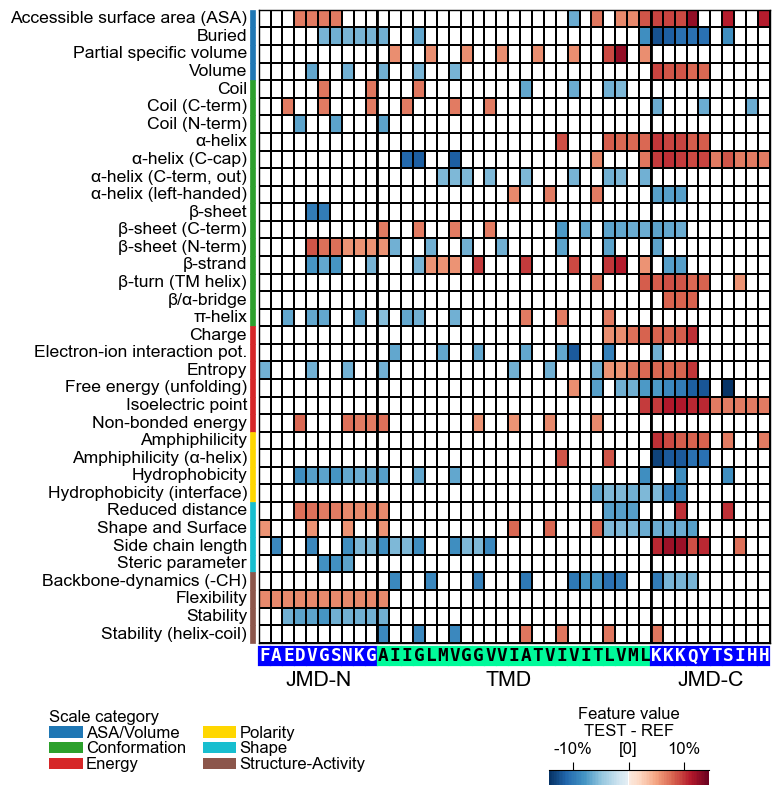

In [9]:
# Get sequence parts of first sample
cpp_plot = aa.CPPPlot()
jmd_n_seq, tmd_seq, jmd_c_seq = df_seq.loc[0, ["jmd_n", "tmd", "jmd_c"]]
args_seq = dict(jmd_n_seq=jmd_n_seq, tmd_seq=tmd_seq, jmd_c_seq=jmd_c_seq)
print("Sequence parts of first sample")
print(jmd_n_seq, tmd_seq, jmd_c_seq)

# Plot CPP profile for first sample
cpp_plot.heatmap(df_feat=df_feat, **args_seq)
plt.show()

You can customize the following color parameters: ``tmd_color`` (default='mediumspringgreen'), ``jmd_color`` (default='blue'), ``tmd_seq_color`` (default='black'), and ``jmd_seq_color`` (default='white'):

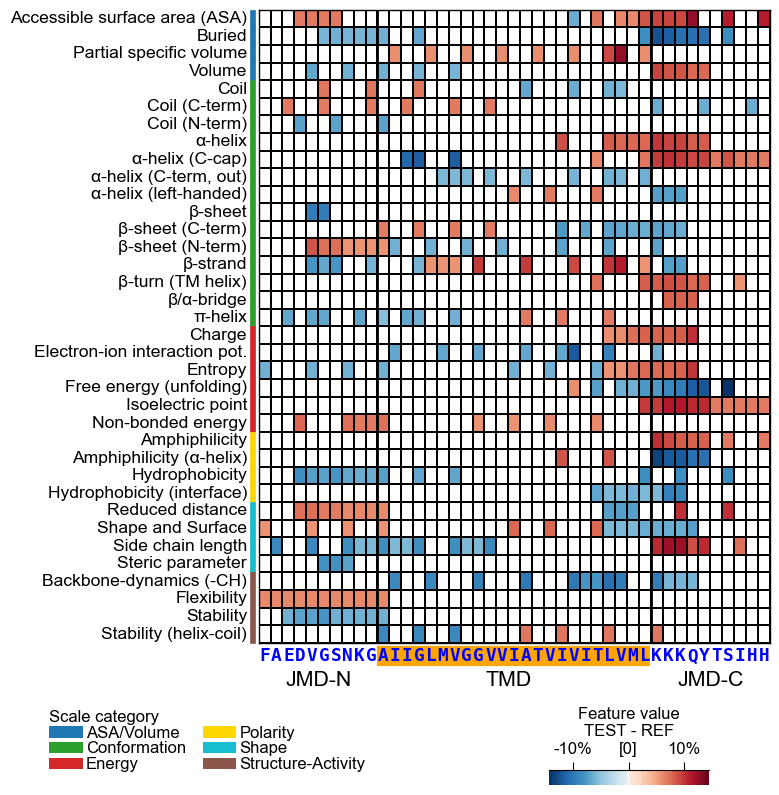

In [10]:
# Change default TMD-JMD colors
cpp_plot.heatmap(df_feat=df_feat, **args_seq, tmd_color="orange", jmd_color="white", tmd_seq_color="blue", jmd_seq_color="blue")
plt.show()

The fontsize of the sequence is optimized automatically. Set ``verbose=True`` to see the optimized size. You can set it manually using the ``seq_size`` parameter:

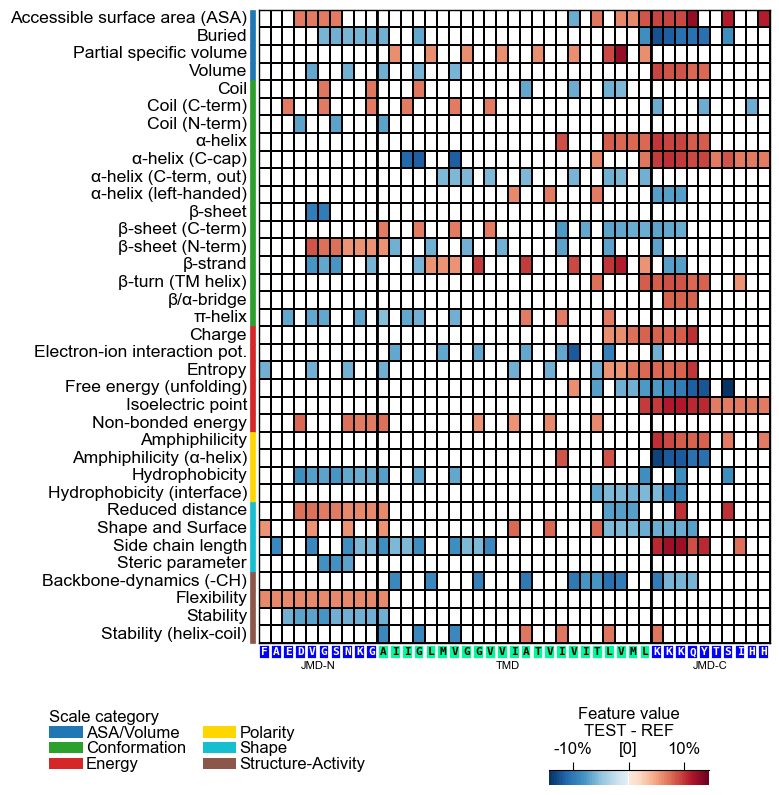

In [11]:
# Change sequence size manually
cpp_plot.heatmap(df_feat=df_feat, **args_seq, seq_size=8)
plt.show()

This might result in suboptimal spacing among sequence characters. Adjust the font size of the part labels ('JMD-N', 'TMD', 'JMD-C') using ``fontsize_tmd_jmd``, which is set by default to the optimized sequence size. Change its weight using ``weight_tmd_jmd`` (default='normal') 

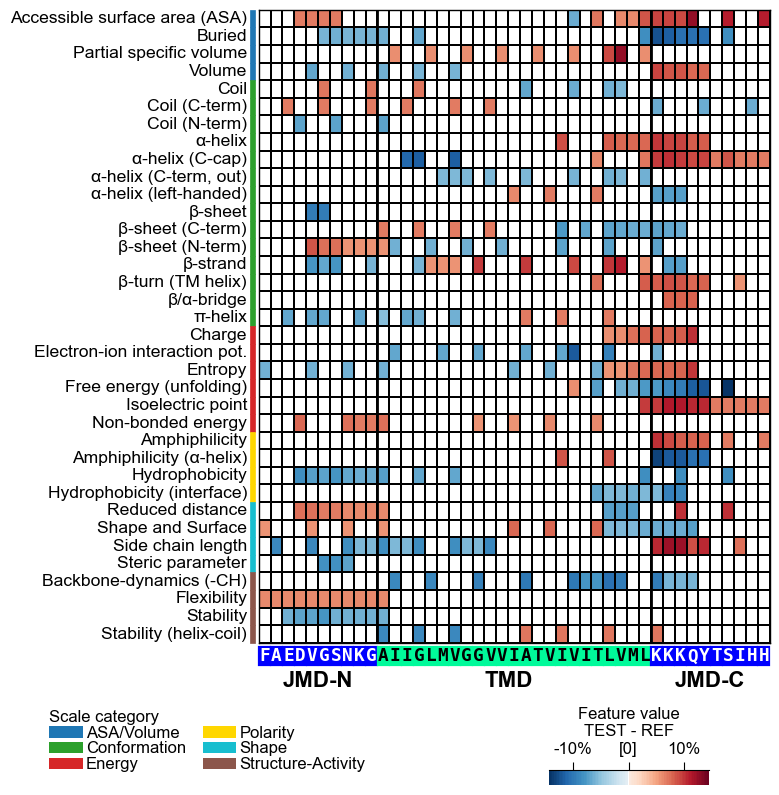

In [12]:
# Adjust the fontsize of the TMD-JMD characters
cpp_plot.heatmap(df_feat=df_feat, **args_seq, fontsize_tmd_jmd=16, weight_tmd_jmd="bold")
plt.show()

Display the xtick positions in addition to the sequence by setting ``add_xticks_pos=True`` (default=False):

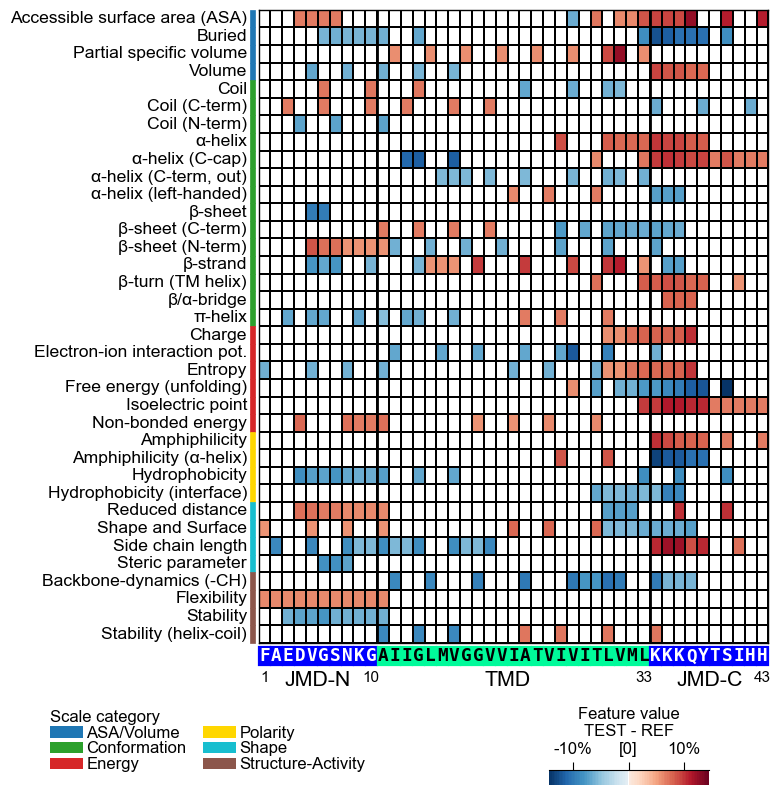

In [13]:
# Add the xticks indicating the sequence positions
cpp_plot.heatmap(df_feat=df_feat, **args_seq, add_xticks_pos=True)
plt.show()

**CPP Analysis**

Use ``fontsize_labels`` (default=12) to change the fontsize of the scale category legend and the colorbar:

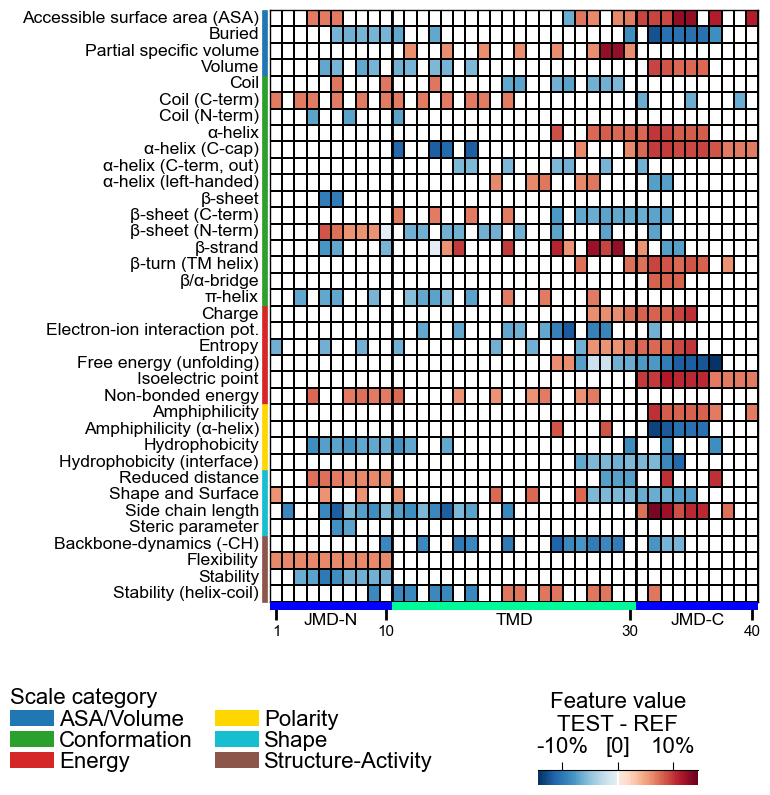

In [14]:
# Modify label size of legend and colorbar
cpp_plot.heatmap(df_feat=df_feat, fontsize_labels=16)
plt.show()

Adjust the heatmap grid using the ``grid_linewidth`` (default=0.01) and ``grid_linecolor`` (set by default based on ``facecolor_dark``) parameters:

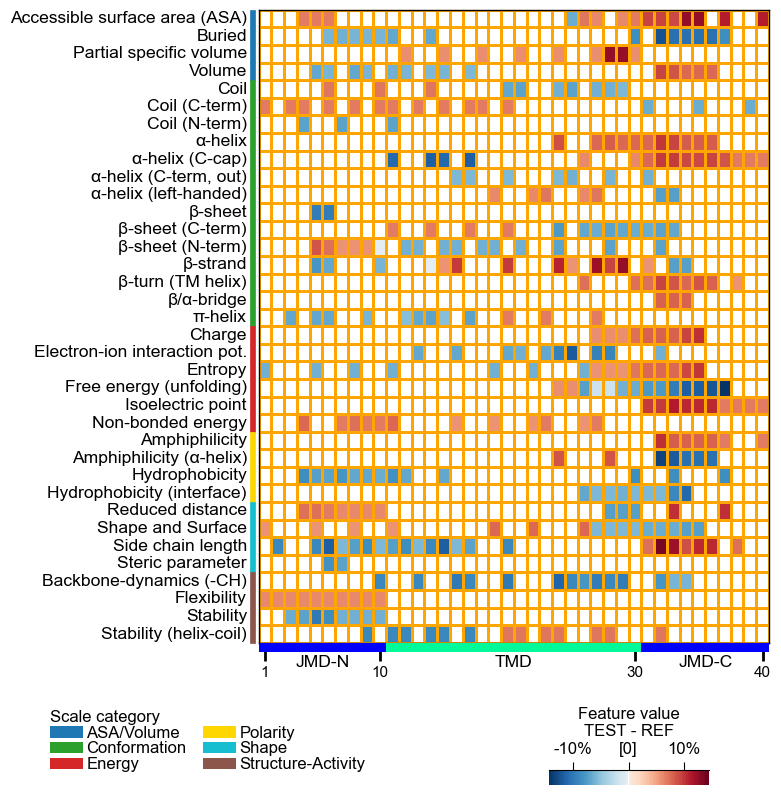

In [15]:
# Adjust heatmap grid
cpp_plot.heatmap(df_feat=df_feat, grid_linewidth=1, grid_linecolor="orange")
plt.show()

The TMD part borders are highlighted by an extra line, which width can be customized by ``border_linewidth`` (default=2):

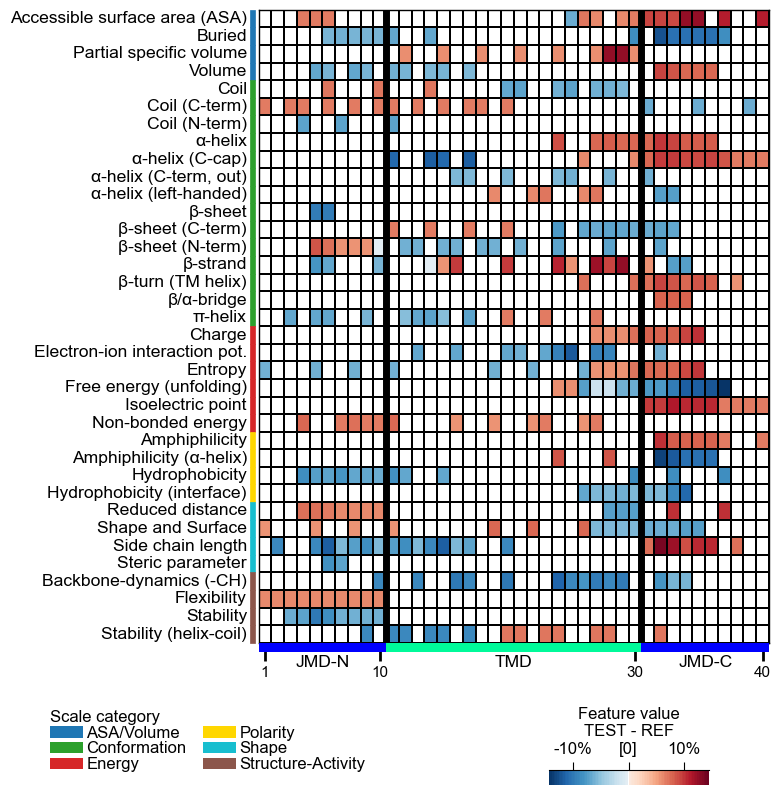

In [16]:
# Increase width of TMD border
cpp_plot.heatmap(df_feat=df_feat, border_linewidth=5)
plt.show()

The background is set automatically basd on ``shap_plot``. You can set it to black by ``facecolor_dark=True``: 

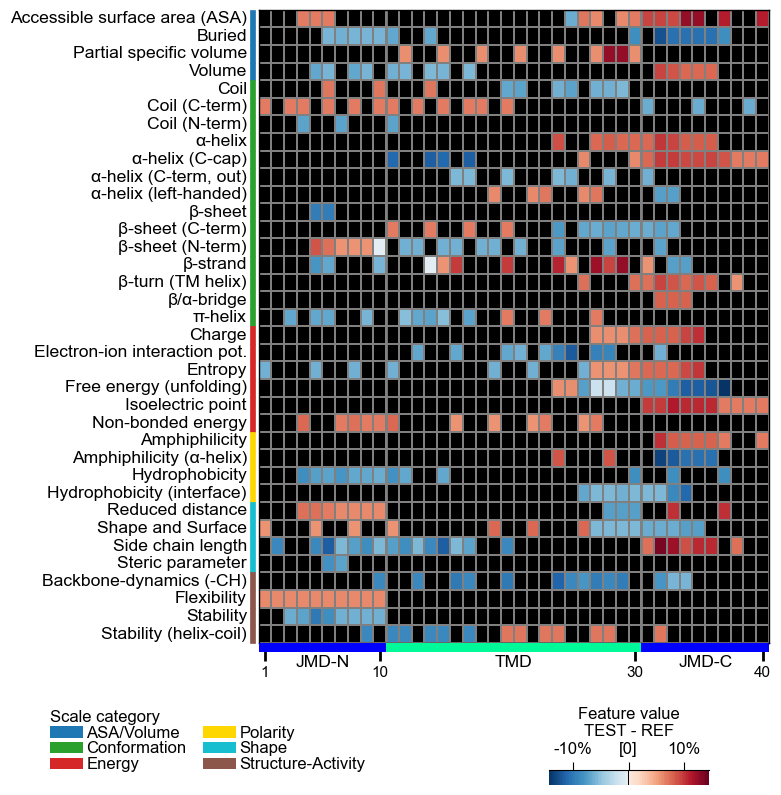

In [17]:
# Set background to black
cpp_plot.heatmap(df_feat=df_feat, facecolor_dark=True)
plt.show()

Adjust the lower and upper end of the colormap using the ``vmin`` and ``vmax`` parameters:

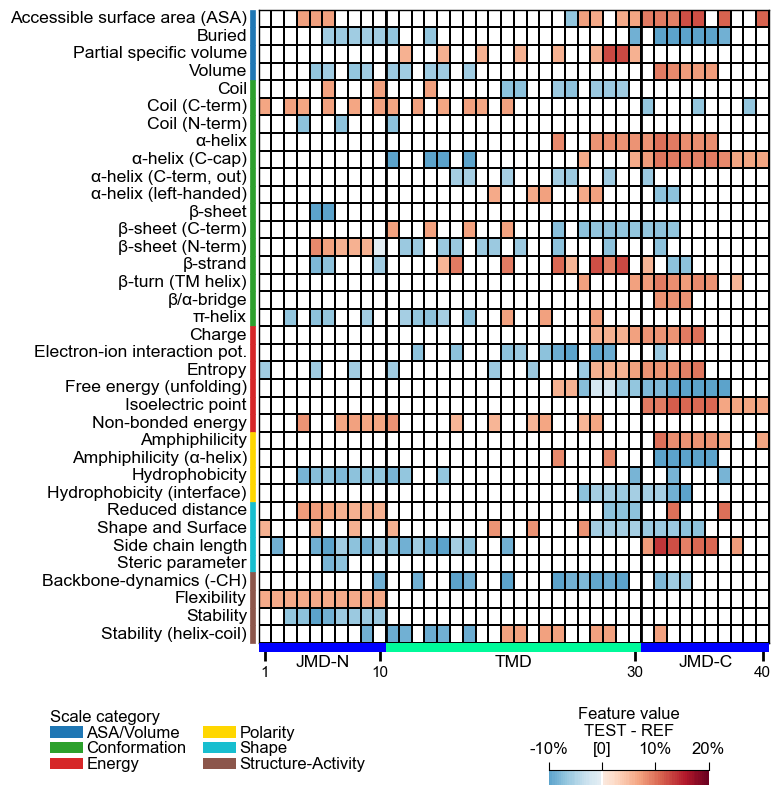

In [18]:
# Change minimum and maximum values
cpp_plot.heatmap(df_feat=df_feat, vmin=-10, vmax=20)
plt.show()

You can provide any colormap from [Matplotlib Colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html) using the ``cmap`` parameter. The number of discrete steps can be adjusted by ``cmap_n_colors`` (default=101): 

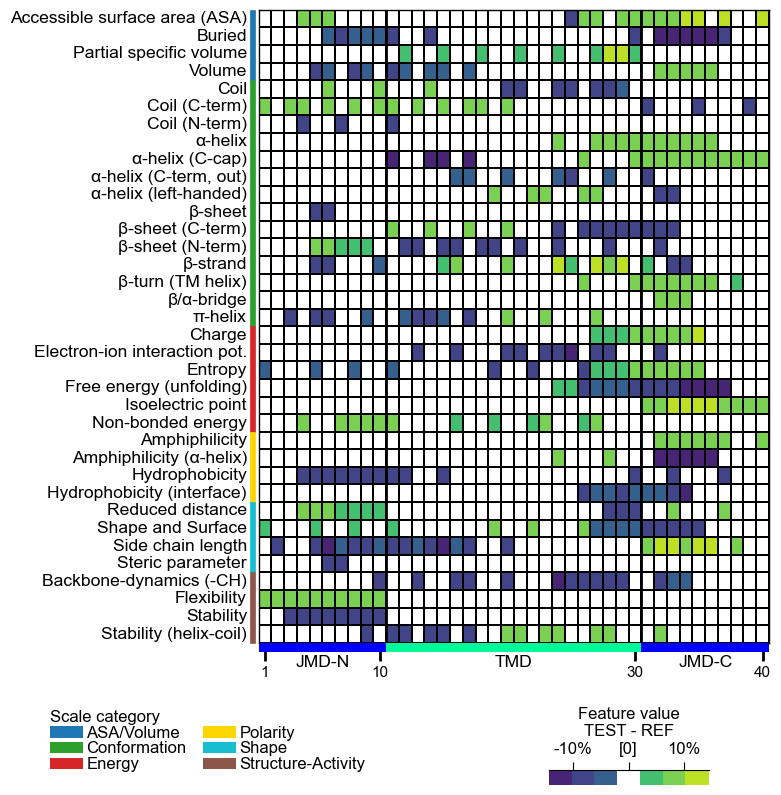

In [19]:
# Use matplotlib color map with 7 color steps
cpp_plot.heatmap(df_feat=df_feat, cmap="viridis", cmap_n_colors=7)
plt.show()

Customize the colorbar using ``cbar_kws``. You can adjust its position (x-axis, y-axis), width, and height by ``cbar_xywh`` (default=(0.7, None, 0.2, None)), where default values are adopted if ``None`` is provided.

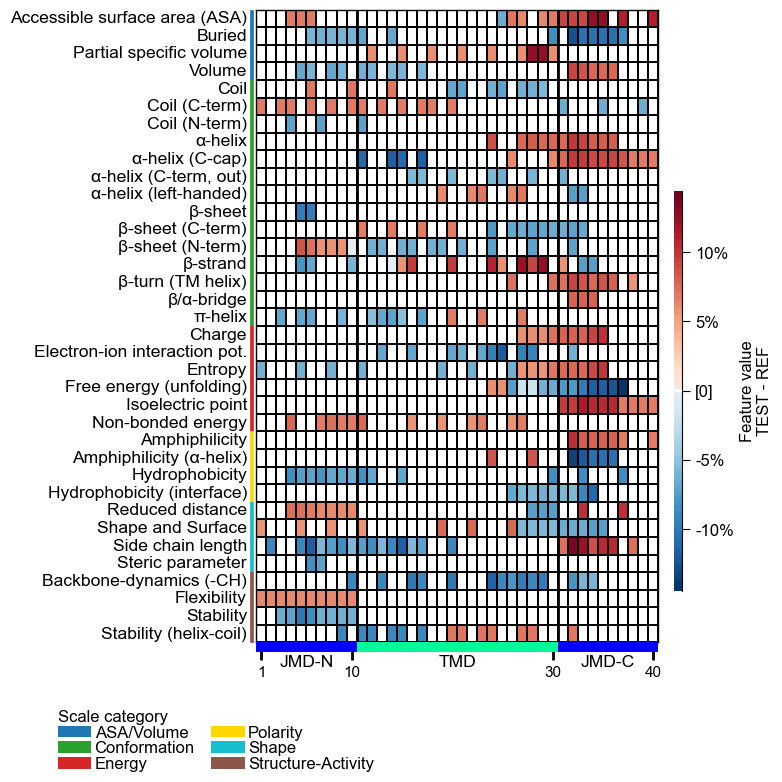

In [20]:
# Change colorbar title, position, width and height
cbar_kws = dict(orientation="vertical")
fig, ax = cpp_plot.heatmap(df_feat=df_feat, cbar_kws=cbar_kws,
                           cbar_xywh=(0.86, 0.25, 0.01, 0.5))
# Plot must be adjusted by plt.subplots_adjust and not by plt.tight_layout
plt.subplots_adjust(right=0.84)
plt.show()

Adjust the scale legend by the ``legend_kws`` parameter and its position using ``legend_xy`` (default=(-0.1, -0.01)):

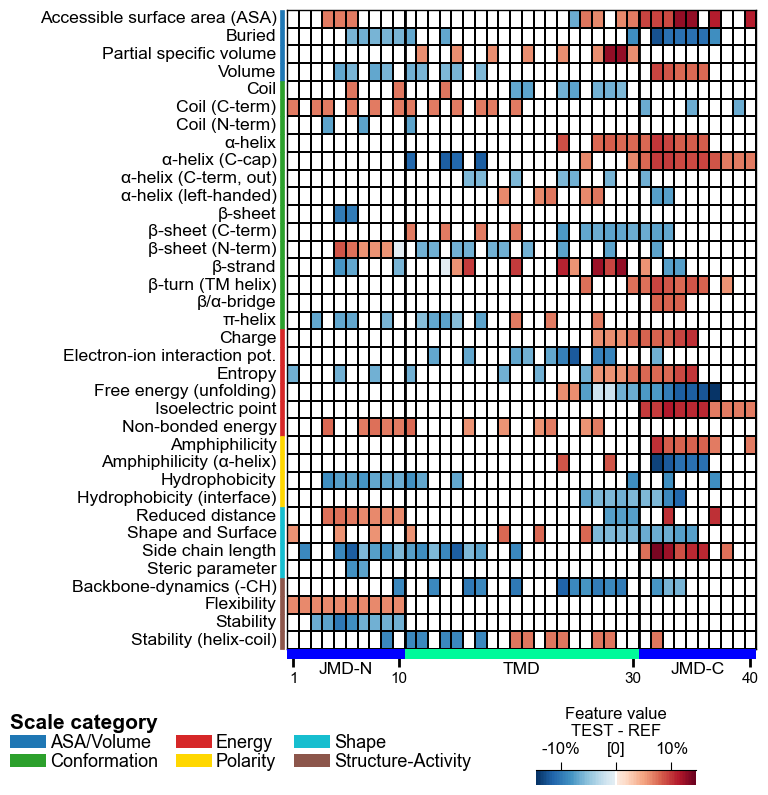

In [21]:
# Adjust legend, colors can be changed by 'dict_color' 
legend_kws = dict(n_cols=3, fontsize=13, fontsize_title=15, weight_title="bold")
cpp_plot.heatmap(df_feat=df_feat, legend_kws=legend_kws, legend_xy=(None, 0.05))
plt.show()

Following x-tick parameters can be adjusted: xtick_size (default=11.0), xtick_width (default=2.0), and xtick_length (default=5.0):

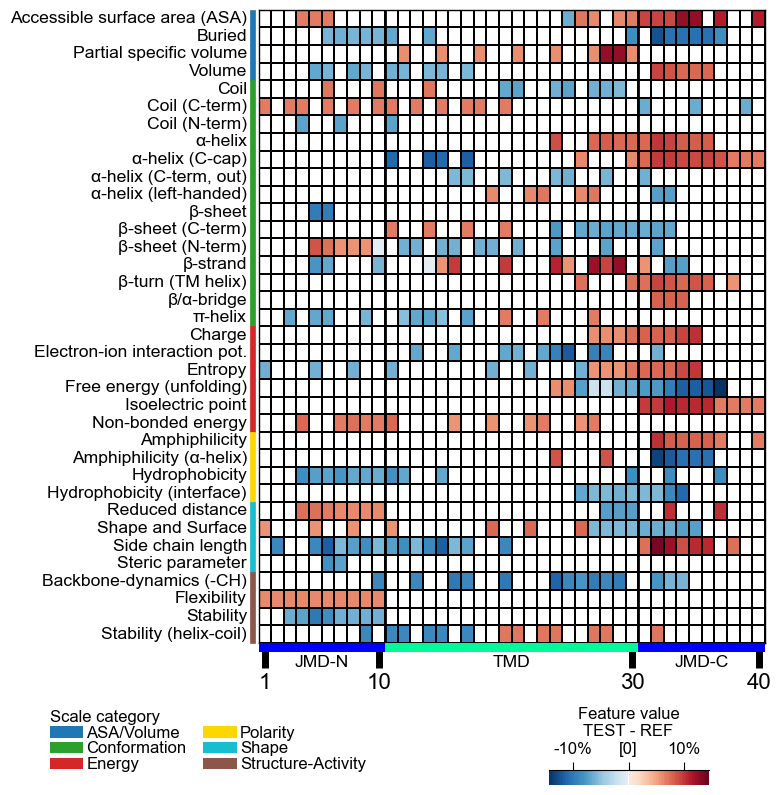

In [22]:
# Adjust x-ticks 
cpp_plot.heatmap(df_feat=df_feat, xtick_size=16, xtick_width=5, xtick_length=10)
plt.show()

**CPP-SHAP analysis**

Set ``shap_plot=True`` for visualizing the sample-specific feature impact instead of the overall feature importance. To demonstrate this, we create the feature matrix for the DOM_GSEC example dataset (see [Breimann25a]_) using the ``SequenceFeature().feature_matrix()`` method:

In [25]:
# Create feature matrix
sf = aa.SequenceFeature()
df_parts = sf.get_df_parts(df_seq=df_seq)
X = sf.feature_matrix(features=df_feat["feature"], df_parts=df_parts)

Next, we must include the feature impact into the df_feat for all samples using the ``ShapModel`` model:

In [26]:
labels = df_seq["label"].to_list()

# Fit SHAP explainer to obtain SHAP values
sm = aa.ShapModel()
sm.fit(X, labels=labels)

# Include feature value difference and feature impact for all samples
df_feat = sm.add_sample_mean_dif(X, labels=labels, df_feat=df_feat, drop=True)
df_feat = sm.add_feat_impact(df_feat=df_feat, drop=True)
aa.display_df(df_feat, n_rows=5, n_cols=15, show_shape=True)

DataFrame shape: (150, 265)


,feature,category,subcategory,scale_name,scale_description,abs_auc,abs_mean_dif,mean_dif,std_test,std_ref,p_val_mann_whitney,p_val_fdr_bh,positions,mean_dif_Protein0,mean_dif_Protein1
1,"TMD_C_JMD_C-Seg...,11)-LIFS790102",Conformation,β-strand,β-strand,"Conformational ...n-Sander, 1979)",0.189000,0.125674,0.125674,0.183876,0.218813,0.000001,0.000039,"28,29",0.364754,0.379754
2,"TMD_C_JMD_C-Seg...2,3)-CHOP780212",Conformation,β-sheet (C-term),β-turn (1st residue),"Frequency of th...-Fasman, 1978b)",0.199000,0.065983,-0.065983,0.087814,0.105835,0.000000,0.000016,"27,28,29,30,31,32,33",-0.244818,-0.224388
3,"TMD_C_JMD_C-Seg...3,4)-HUTJ700102",Energy,Entropy,Entropy,"Absolute entrop...Hutchens, 1970)",0.229000,0.098224,0.098224,0.106865,0.124608,0.000000,0.000001,"31,32,33,34,35",0.162838,0.243838
4,"TMD_C_JMD_C-Seg...2,3)-AURR980110",Conformation,α-helix,α-helix (middle),"Normalized posi...ora-Rose, 1998)",0.211000,0.077355,0.077355,0.102965,0.107453,0.000000,0.000005,"27,28,29,30,31,32,33",0.203609,0.120469
5,"TMD_C_JMD_C-Pat...4,8)-JANJ790102",Energy,Free energy (unfolding),Transfer free e...(TFE) to inside,"Transfer free e...y (Janin, 1979)",0.187000,0.144354,-0.144354,0.181777,0.233103,0.000001,0.000049,"33,37",-0.254103,-0.180103


Finally, we can visualize the feature impact for a selected sample by providing the respective column name in ``col_val`` and its sequence parameters together with setting ``shap_plot=True``:

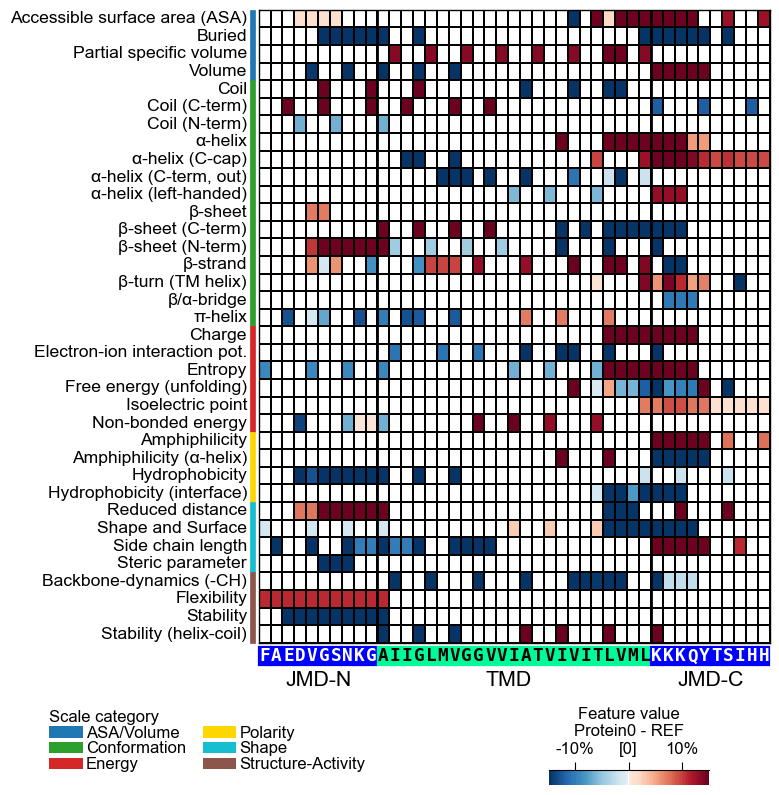

In [27]:
# Plot CPP heatmap for selected protein (use similar value range for comparability)
cpp_plot.heatmap(df_feat=df_feat, shap_plot=True, 
                 col_val="mean_dif_Protein0", name_test="Protein0",
                 tmd_seq=tmd_seq, jmd_n_seq=jmd_n_seq, jmd_c_seq=jmd_c_seq, 
                 vmin=-15, vmax=15)
plt.show()

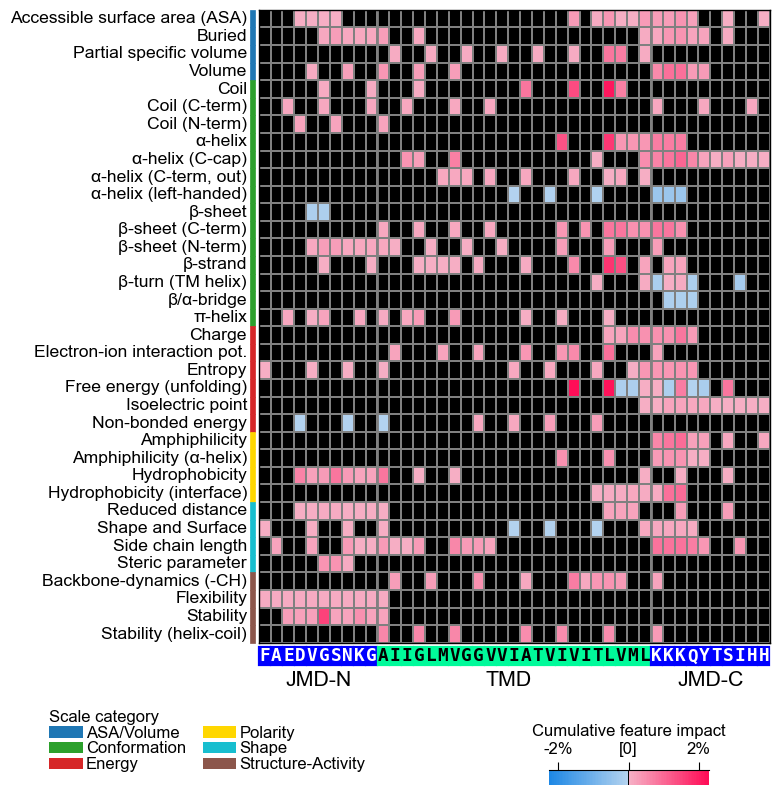

In [28]:
# Plot CPP-SHAP heatmap for selected protein
cpp_plot.heatmap(df_feat=df_feat, shap_plot=True, 
                 col_val="feat_impact_Protein0", 
                 tmd_seq=tmd_seq, jmd_n_seq=jmd_n_seq, jmd_c_seq=jmd_c_seq)
plt.show()